# Jamie's Notebook - Phase 3 Project

## Project Requirements:

Problem First: Start with a problem that you are interested in that you could potentially solve with a classification model. Then look for data that you could use to solve that problem. This approach is high-risk, high-reward: Very rewarding if you are able to solve a problem you are invested in, but frustrating if you end up sinking lots of time in without finding appropriate data. To mitigate the risk, set a firm limit for the amount of time you will allow yourself to look for data before moving on to the Data First approach.

Data First: Take a look at some of the most popular internet repositories of cool data sets we've listed below. If you find a data set that's particularly interesting for you, then it's totally okay to build your problem around that data set.

### Car Crash data:

Build a classifier to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any interesting patterns. Note that there is a multi-class classification problem. You will almost certainly want to bin or trim or otherwise limit the number of target categories on which you ultimately predict. Note e.g. that some primary contributory causes have very few samples.

### Stakeholder
> ?

### Business Problem
> ?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

Crash data shows information about each traffic crash on city streets within the **City of Chicago** limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

All crashes are recorded as per the format specified in the Traffic Crash Report, SR1050, of the Illinois Department of Transportation. **As per Illinois statute, only crashes with a property damage value of *1,500 or more* or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes.** However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [4]:
# read in file
# Source: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if 
data = pd.read_csv('traffic_crashes_chicago.csv')

In [5]:
data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [20]:
def basic_info(data):
    print("Dataset shape is: ", data.shape)
    print("Dataset size is: ", data.size)
    print("Dataset columns are: ", data.columns)
    print("Dataset info is: ", data.info())
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical variables are:\n ", categorical)
    print("Numerical variables are:\n ", numerical)
    return categorical, numerical


In [5]:
len(data)

482866

In [17]:
data.latitude

0         41.919664
1         41.741804
2         41.773456
3         41.802119
4               NaN
            ...    
482861    41.877790
482862    41.800697
482863    41.924709
482864    41.802871
482865    41.953010
Name: latitude, Length: 482866, dtype: float64

In [21]:
data.crash_date_est_i.value_counts()

Y    31510
N     4749
Name: crash_date_est_i, dtype: int64

In [4]:
data.isna().sum() 

CRASH_RECORD_ID                       0
RD_NO                              3917
CRASH_DATE_EST_I                 446607
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         283902
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       11746
CRASH_TYPE                            0
INTERSECTION_RELATED_I           373918
NOT_RIGHT_OF_WAY_I               460154
HIT_AND_RUN_I                    340916
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [31]:
len(data_fsm)

0

In [53]:
data_fsm = data.fillna(value=0)

In [72]:
lots_o_missing = ['crash_record_id', 'dead?']
for col in data_fsm.columns:
    if len(data_fsm[col][data_fsm[col]==0]) > 300000:
        lots_o_missing.append(col)
lots_o_missing

['crash_record_id',
 'dead?',
 'crash_date_est_i',
 'intersection_related_i',
 'not_right_of_way_i',
 'hit_and_run_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i',
 'work_zone_i',
 'work_zone_type',
 'workers_present_i',
 'injuries_total',
 'injuries_fatal',
 'injuries_incapacitating',
 'injuries_non_incapacitating',
 'injuries_reported_not_evident',
 'injuries_unknown',
 'dead?']

In [73]:
from sklearn.linear_model import LogisticRegression
X = data_fsm.drop(labels=lots_o_missing, axis=1).select_dtypes(exclude='object')
y = data_fsm['dead?']
lr = LogisticRegression()
lr.fit(X, y)


/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
lr.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 11,
 'classes_': array([0, 1]),
 'coef_': array([[-4.86970039e-02, -7.94178629e-04,  5.56948288e-06,
         -7.08991046e-04, -2.40129103e-02, -1.03121109e-01,
         -8.97477343e-02, -5.32517345e-02, -5.09047128e-02,
         -1.42348924e-02,  2.79211287e-02]]),
 'intercept_': array([-0.01476691]),
 'n_iter_': array([100], dtype=int32)}

In [74]:
lr.score(X, y)

0.9990245741054454

In [76]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree 
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

In [70]:
data_fsm.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,0,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,0,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,0,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,0,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,0,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,0.000000,0.000000,0


In [71]:
data_fsm['dead?'] = np.where(data_fsm['injuries_fatal']>0, 1, 0)
data_fsm.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,dead?
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,0,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,0,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,0,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),0
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,0,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),0
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,0,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,14,4,7,0.000000,0.000000,0,0


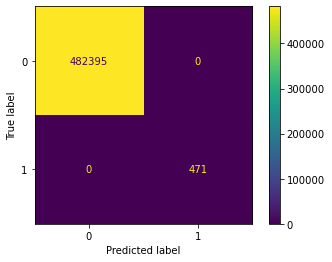

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X, y)

In [84]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [79]:
!pip install imblearn

     |████████████████████████████████| 206 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 5.4 MB/s eta 0:00:01     |██████████████▉                 | 3.3 MB 4.2 MB/s eta 0:00:01     |████████████████▍               | 3.7 MB 4.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [81]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_sample(X, y)


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/sklearn/utils/fixes.py)

In [6]:
data.columns = [data.columns[i].lower() for i in range(len(data.columns))]

In [17]:
data.iloc[111].crash_date

'04/30/2018 03:07:00 PM'

In [19]:
data['month'] = data['crash_date'].apply(lambda x: int(x[:2]))
data['day'] = data['crash_date'].apply(lambda x: int(x[3:5]))
data['year'] = data['crash_date'].apply(lambda x: int(x[6:10]))
data['time_of_crash'] = data['crash_date'].apply(
    lambda x: int(x[11:13]+x[14:16]+x[17:19]) if 'AM' in x else int((str(int(x[11:13])+12))+x[14:16]+x[17:19])
)
data['time_of_crash'].iloc[111]




150700

In [7]:
data.crash_date.dtype

dtype('O')

In [11]:
data.columns

Index(['crash_record_id', 'rd_no', 'crash_date_est_i', 'crash_date',
       'posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'lane_cnt', 'alignment', 'roadway_surface_cond',
       'road_defect', 'report_type', 'crash_type', 'intersection_related_i',
       'not_right_of_way_i', 'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence',
       'photos_taken_i', 'statements_taken_i', 'dooring_i', 'work_zone_i',
       'work_zone_type', 'workers_present_i', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'la

## Visualizations

##### Sources:

https://data.cityofchicago.org/browse?tags=gis

In [39]:
import geopandas as gpd

chitown = gpd.read_file('data/Public_Expressway_Crash_Rates_2008_2012.shp')

In [29]:
data.street_name.value_counts(sort=True)

WESTERN AVE        13155
PULASKI RD         11553
CICERO AVE         10515
ASHLAND AVE        10471
HALSTED ST          9209
                   ...  
BURKHARDT DR           1
EAST CIRCLE AVE        1
FRANKLIN SD            1
57TH BLVD              1
HOWLAND AVE            1
Name: street_name, Length: 1569, dtype: int64

<ipython-input-36-689db38e68ed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(street_names, rotation=45)


[Text(0, 0, 'WESTERN AVE'),
 Text(1, 0, 'PULASKI RD'),
 Text(2, 0, 'CICERO AVE'),
 Text(3, 0, 'ASHLAND AVE'),
 Text(4, 0, 'HALSTED ST'),
 Text(5, 0, 'KEDZIE AVE'),
 Text(6, 0, 'MICHIGAN AVE'),
 Text(7, 0, 'STATE ST'),
 Text(8, 0, 'NORTH AVE'),
 Text(9, 0, 'CLARK ST')]

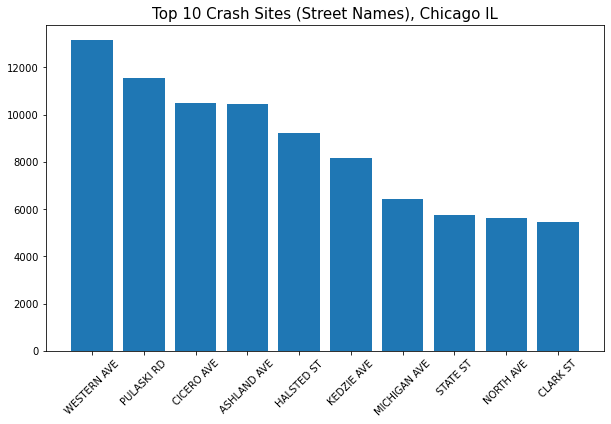

In [36]:
# Top 5 Crash streets
fig, ax = plt.subplots(figsize=(10,6))

street_names = data.street_name.value_counts(sort=True).index[:10]
crash_frequency = data.street_name.value_counts(sort=True).values[:10]

ax.bar(street_names, crash_frequency)
ax.set_title('Top 10 Crash Sites (Street Names), Chicago IL', size=15)
ax.set_xticklabels(street_names, rotation=45)

In [43]:
chi1998.head()

,WARD,COUNT,geometry
0,10,46,"POLYGON ((-87.52494 41.70264, -87.52502 41.701..."
1,11,54,"POLYGON ((-87.65534 41.80873, -87.65535 41.808..."
2,12,30,"POLYGON ((-87.67976 41.83914, -87.67795 41.835..."
3,13,63,"POLYGON ((-87.74345 41.77483, -87.74465 41.774..."
4,14,48,"POLYGON ((-87.72015 41.80803, -87.72019 41.808..."


In [44]:
data.latitude.value_counts()

41.976201    619
41.791420    326
41.751461    321
41.722257    267
41.900959    246
            ... 
41.802244      1
41.959765      1
41.864285      1
41.702748      1
41.920839      1
Name: latitude, Length: 210866, dtype: int64

In [50]:
data.longitude.dtype

dtype('float64')

<AxesSubplot:>

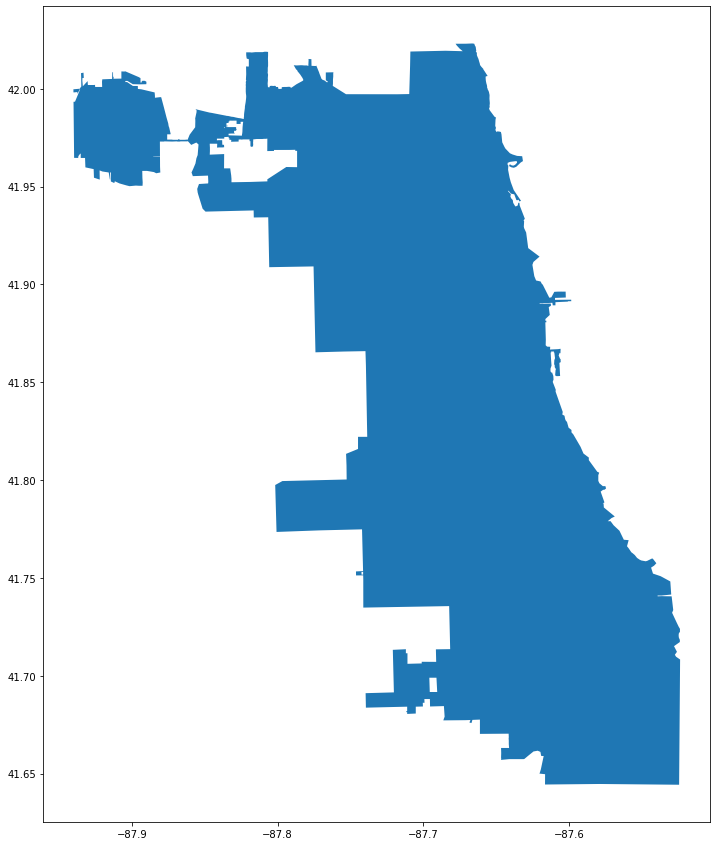

In [54]:
locations = data[['latitude', 'longitude']].dropna()
chiboundaries = gpd.read_file('data/chipoli.shp')

fig, ax = plt.subplots(figsize=(15,15))

chiboundaries.plot(ax=ax)

In [92]:
locations = data[data['latitude']!=0]
locations

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,month,day,year,time_of_crash
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),7,10,2019,175600
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),6,30,2017,160000
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),7,10,2020,102500
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),7,11,2020,10000
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,14,4,7,NaN,NaN,NaN,7,8,2020,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482861,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,NaN,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,...,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619),1,19,2021,73000
482862,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,NaN,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369),1,20,2021,175000
482863,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,NaN,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649),1,20,2021,161500
482864,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,NaN,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,...,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721),1,20,2021,152000


In [93]:
len(locations[locations.longitude==0])

0

In [94]:
len(locations[locations.latitude==0])

0

In [60]:
locations.longitude.max()

0.0

Text(0.5, 1.0, 'Location of Incapacitating or Fatal Injuries - Car Crashes in Chicago, IL')

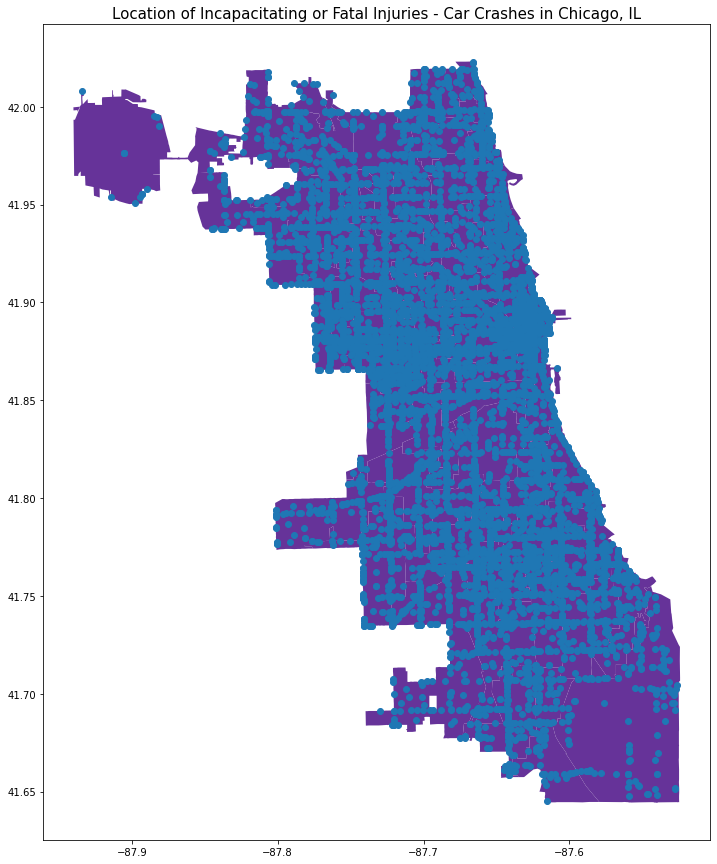

In [95]:
chi1998 = gpd.read_file('data/ward1998.shp')
fig, ax = plt.subplots(figsize=(15,15))

chi1998.plot(ax=ax, color='rebeccapurple')
ax.scatter(locations['longitude'][(locations['most_severe_injury']=='INCAPACITATING INJURY')|(locations['most_severe_injury']=='FATAL')],
           locations['latitude'][(locations['most_severe_injury']=='INCAPACITATING INJURY')|(locations['most_severe_injury']=='FATAL')])
ax.set_title('Location of Incapacitating or Fatal Injuries - Car Crashes in Chicago, IL', size=15)

Text(0.5, 1.0, 'Location of Fatal Injuries - Car Crashes in Chicago, IL')

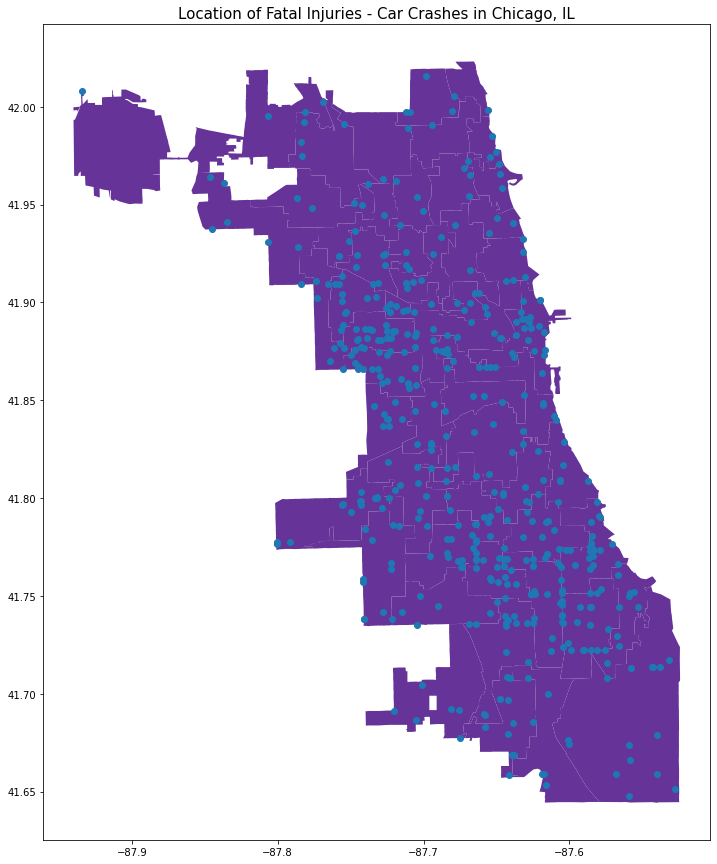

In [96]:
fig, ax = plt.subplots(figsize=(15,15))

chi1998.plot(ax=ax, color='rebeccapurple')
ax.scatter(locations['longitude'][locations['most_severe_injury']=='FATAL'],
           locations['latitude'][locations['most_severe_injury']=='FATAL'])
ax.set_title('Location of Fatal Injuries - Car Crashes in Chicago, IL', size=15)

In [ ]:
# Plot cloropleth showing population density - perhaps denser areas have 
# a higher indidence of crashes
fig, ax = plt.subplots(figsize=(15,15))
chi1998.plot(ax=ax, color='rebeccapurple')

In [ ]:
# Plot crime rate cloropleth - see if there is a higher indidence of crashes
# in more dangerous areas
fig, ax = plt.subplots(figsize=(15,15))
chi1998.plot(ax=ax, color='rebeccapurple')

<ipython-input-70-57e54a7f51e6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(weather_conditions, rotation=45)


[Text(0, 0, 'CLEAR'),
 Text(1, 0, 'RAIN'),
 Text(2, 0, 'UNKNOWN'),
 Text(3, 0, 'SNOW'),
 Text(4, 0, 'CLOUDY/OVERCAST'),
 Text(5, 0, 'OTHER'),
 Text(6, 0, 'FOG/SMOKE/HAZE'),
 Text(7, 0, 'SLEET/HAIL'),
 Text(8, 0, 'FREEZING RAIN/DRIZZLE'),
 Text(9, 0, 'BLOWING SNOW'),
 Text(10, 0, 'SEVERE CROSS WIND GATE'),
 Text(11, 0, 'BLOWING SAND, SOIL, DIRT')]

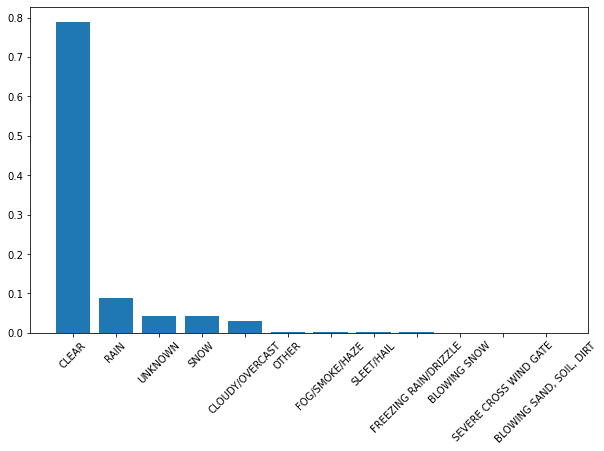

In [70]:
# comparing crash frequency and weather condition

fig, ax = plt.subplots(figsize=(10,6))

weather_conditions = data.weather_condition.value_counts(sort=True).index
weather_frequencies = data.weather_condition.value_counts(sort=True, normalize=True).values

ax.bar(weather_conditions, weather_frequencies)
ax.set_xticklabels(weather_conditions, rotation=45)

In [23]:
data.road_defect.value_counts(sort=True).index

Index(['NO DEFECTS', 'UNKNOWN', 'RUT, HOLES', 'OTHER', 'WORN SURFACE',
       'SHOULDER DEFECT', 'DEBRIS ON ROADWAY'],
      dtype='object')

Text(0.5, 1.0, 'types of road defects')

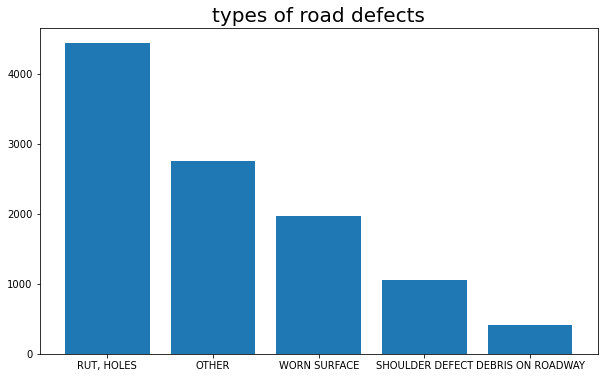

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

defect_types = data.road_defect.value_counts(sort=True).index[2:]

frequency = data.road_defect.value_counts(sort=True).values[2:]

ax.bar(defect_types, frequency)
ax.set_title('types of road defects', size=20)

In [71]:
data.most_severe_injury.value_counts()

NO INDICATION OF INJURY     420003
NONINCAPACITATING INJURY     34253
REPORTED, NOT EVIDENT        19319
INCAPACITATING INJURY         7842
FATAL                          471
Name: most_severe_injury, dtype: int64

Text(0.5, 1.0, 'Number of Crashes with INCAPACITATING or FATAL Injuries sorted by Time of Day')

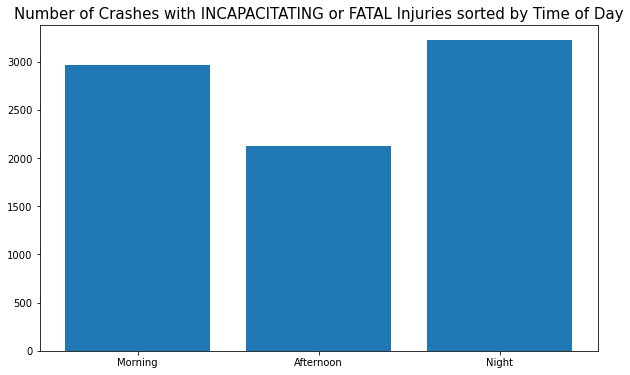

In [81]:
# Comparing distribution of incapacitating/fatal injuries and time of day
fig, ax = plt.subplots(figsize=(10,6))
crash_times = ['Morning', 'Afternoon', 'Night']
crash_counts_injuries = [
               len(data[(data['time_of_crash']<120000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))]),
               len(data[(data['time_of_crash']>=120000)&(data['time_of_crash']<170000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))]),
               len(data[(data['time_of_crash']>=170000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))])
               ]

ax.bar(crash_times, crash_counts_injuries)
ax.set_title('Number of Crashes with INCAPACITATING or FATAL Injuries sorted by Time of Day', size=15)

Text(0.5, 1.0, 'Number of Crashes based on Time of Day, Chicago, IL')

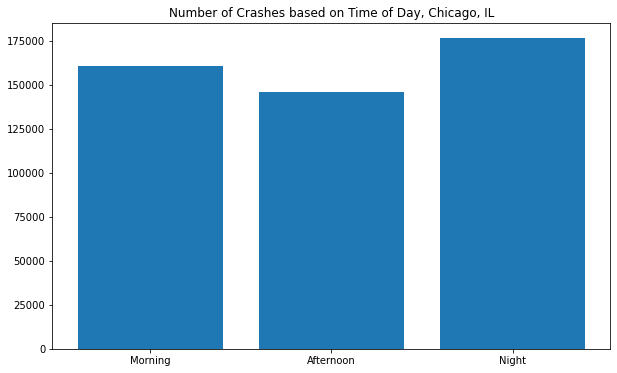

In [82]:
# Comparing distribution of crash times
fig, ax = plt.subplots(figsize=(10,6))
crash_times = ['Morning', 'Afternoon', 'Night']
crash_counts = [
               len(data['time_of_crash'][data['time_of_crash']<120000]),
               len(data['time_of_crash'][(data['time_of_crash']>=120000)&(data['time_of_crash']<170000)]),
               len(data['time_of_crash'][(data['time_of_crash']>=170000)])
               ]
ax.bar(crash_times, crash_counts)
ax.set_title('Number of Crashes based on Time of Day, Chicago, IL')

In [83]:
data.prim_contributory_cause.value_counts()

UNABLE TO DETERMINE                                                                 178549
FAILING TO YIELD RIGHT-OF-WAY                                                        53126
FOLLOWING TOO CLOSELY                                                                51323
NOT APPLICABLE                                                                       25911
IMPROPER OVERTAKING/PASSING                                                          22909
IMPROPER BACKING                                                                     21142
FAILING TO REDUCE SPEED TO AVOID CRASH                                               20797
IMPROPER LANE USAGE                                                                  18673
IMPROPER TURNING/NO SIGNAL                                                           16019
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  15014
DISREGARDING TRAFFIC SIGNALS                                                          8744

<ipython-input-84-9142836e6fc8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(causes, rotation=90)


[Text(0, 0, 'UNABLE TO DETERMINE'),
 Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
 Text(2, 0, 'FOLLOWING TOO CLOSELY'),
 Text(3, 0, 'NOT APPLICABLE'),
 Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
 Text(5, 0, 'IMPROPER BACKING'),
 Text(6, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
 Text(7, 0, 'IMPROPER LANE USAGE'),
 Text(8, 0, 'IMPROPER TURNING/NO SIGNAL'),
 Text(9, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE')]

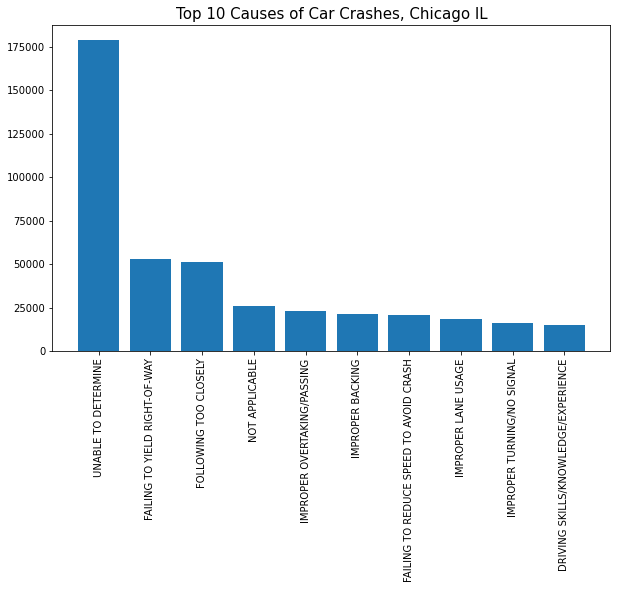

In [84]:
# Top 10 primary causes of car crashes
fig, ax = plt.subplots(figsize=(10,6))
causes = data.prim_contributory_cause.value_counts(sort=True).index[:10]
cause_freq = data.prim_contributory_cause.value_counts(sort=True).values[:10]

ax.bar(causes, cause_freq)
ax.set_title('Top 10 Causes of Car Crashes, Chicago IL', size=15)
ax.set_xticklabels(causes, rotation=90)

In [73]:
data.injuries_incapacitating.value_counts()

0.0    473984
1.0      6934
2.0       726
3.0       174
4.0        62
5.0        15
6.0         3
7.0         1
Name: injuries_incapacitating, dtype: int64

In [72]:
data.injuries_fatal.value_counts()

0.0    481428
1.0       437
2.0        28
3.0         5
4.0         1
Name: injuries_fatal, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482866 entries, 0 to 482865
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                482866 non-null  object 
 1   rd_no                          478949 non-null  object 
 2   crash_date_est_i               36259 non-null   object 
 3   crash_date                     482866 non-null  object 
 4   posted_speed_limit             482866 non-null  int64  
 5   traffic_control_device         482866 non-null  object 
 6   device_condition               482866 non-null  object 
 7   weather_condition              482866 non-null  object 
 8   lighting_condition             482866 non-null  object 
 9   first_crash_type               482866 non-null  object 
 10  trafficway_type                482866 non-null  object 
 11  lane_cnt                       198964 non-null  float64
 12  alignment                     

## Models